In [2926]:
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [2927]:
def extend(syms,n):
    result = []
    for s in syms:
        for i in range(n):
            result.append(s)

    return np.array(result,dtype=np.uint8)

def change_dynamic_range(s, in_min, in_max, out_min, out_max):
    return (s - in_min) / (in_max - in_min) * (out_max - out_min) + out_min


In [2940]:
family = 'db6'
data = change_dynamic_range(extend(np.random.randint(0,255,4),16),0,255,-128,127)
data = np.pad(data,(10,10),mode='constant',constant_values=0)
noise = (255*0.01)*np.random.normal(0,1.0,len(data))
print(len(data))

84


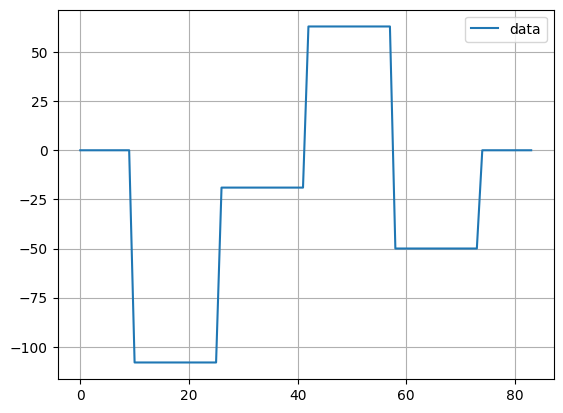

In [2929]:
noisy_data = data + noise
plt.plot(data,label='data')
# plt.plot(noise+data,label='noisy data')
plt.legend()
plt.grid()
plt.show()

In [2943]:
coeffs = pywt.wavedec(data,family,level=4)
print(len(coeffs[0]))


15


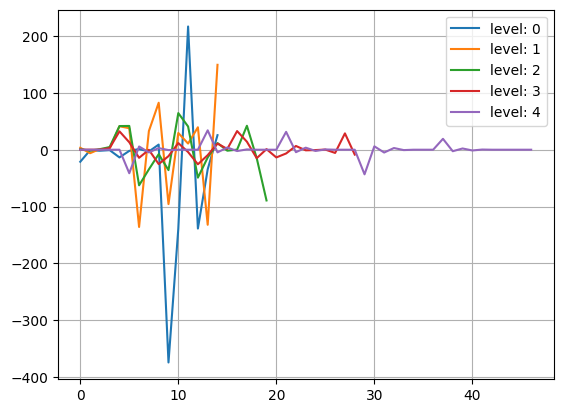

In [2931]:
for i,c in enumerate(coeffs):
    plt.plot(c,label=f'level: {i}')
plt.legend()
plt.grid()
plt.show()

In [2945]:
new_coeffs = coeffs.copy()
method = 'soft'
thr=max(abs(new_coeffs[0]))
print(thr)
new_coeffs[0] = pywt.threshold(new_coeffs[0],thr*0.02,method)
new_coeffs[1] = pywt.threshold(new_coeffs[1],thr*0.02,method)
new_coeffs[2] = pywt.threshold(new_coeffs[2],thr*0.02,method)
new_coeffs[3] = pywt.threshold(new_coeffs[3],thr*0.05,method)
new_coeffs[4] = pywt.threshold(new_coeffs[4],thr*0.15,method)

437.214107454401


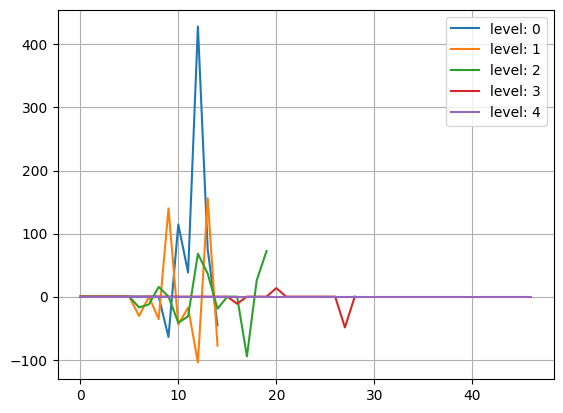

In [2946]:
for i,c in enumerate(new_coeffs):
    plt.plot(c,label=f'level: {i}')
plt.legend()
plt.grid()
plt.show()

In [2952]:
for i,c in enumerate(coeffs):
    print(np.count_nonzero(c))

15
15
20
29
37


In [2951]:
acc = 0
for i,c in enumerate(new_coeffs):
    print(np.count_nonzero(c))
print(acc)

6
9
11
3
0
0


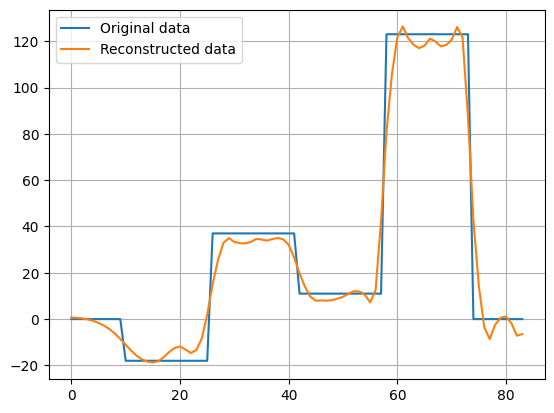

In [2949]:
new_data = pywt.waverec(new_coeffs,family)   

plt.plot(data,label='Original data')
# plt.plot(noisy_data,label='Noisy data')
plt.plot(new_data, label='Reconstructed data')
plt.legend()
plt.grid()
plt.show()

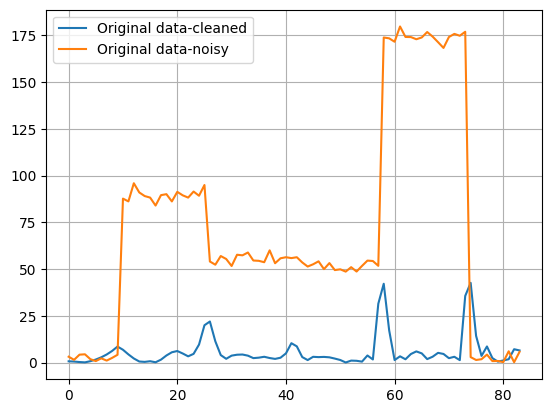

5.736137018366455
71.29170188039875


In [2950]:
plt.plot(abs(data-new_data),label='Original data-cleaned')
plt.plot(abs(data-noisy_data),label='Original data-noisy')
plt.legend()
plt.grid()
plt.show()
print(np.mean(abs(data-new_data)))
print(np.mean(abs(data-noisy_data)))